In [24]:
# import the required packages
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, VotingClassifier, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVR, SVC
from sklearn import tree
from xgboost import XGBClassifier, XGBRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline

## 1. HR Analytics

### 1.1 Load and Sample the data

In [14]:
#Reading and splitting data into training and testing
data = pd.read_csv('hr_data_new.csv')
df_x = data.drop(['is_promoted'], axis=1)
df_y = data['is_promoted']
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state = 4)

In [15]:
print(x_train, y_train)

      region  education  gender  no_of_trainings  age  previous_year_rating  \
8710       2          1       0                5   30                     4   
6564      22          1       1                1   28                     4   
4892       2          1       1                1   31                     4   
2264      17          1       1                2   27                     3   
2704      13          2       0                1   41                     2   
...      ...        ...     ...              ...  ...                   ...   
456       19          1       1                1   35                     4   
6017      15          0       1                1   28                     2   
709       15          2       1                1   31                     5   
8366       2          0       1                1   22                     4   
1146       2          1       0                1   35                     5   

      length_of_service  KPIs_met >80%  awards_won?

In [16]:
print(x_test, y_test)

      region  education  gender  no_of_trainings  age  previous_year_rating  \
5988      23          1       1                1   41                     3   
2145      26          1       1                1   27                     3   
2624       7          2       1                1   46                     4   
930        2          0       1                1   23                     3   
1001       2          1       1                1   34                     3   
...      ...        ...     ...              ...  ...                   ...   
9214      23          2       0                1   34                     4   
3001      28          1       1                2   38                     5   
6882      20          2       0                1   40                     1   
9243      26          1       1                1   32                     3   
8349      22          2       1                1   33                     4   

      length_of_service  KPIs_met >80%  awards_won?

### 1.2 Build the Model(s)

In [17]:
#Creating Model for Decision Tree classification
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

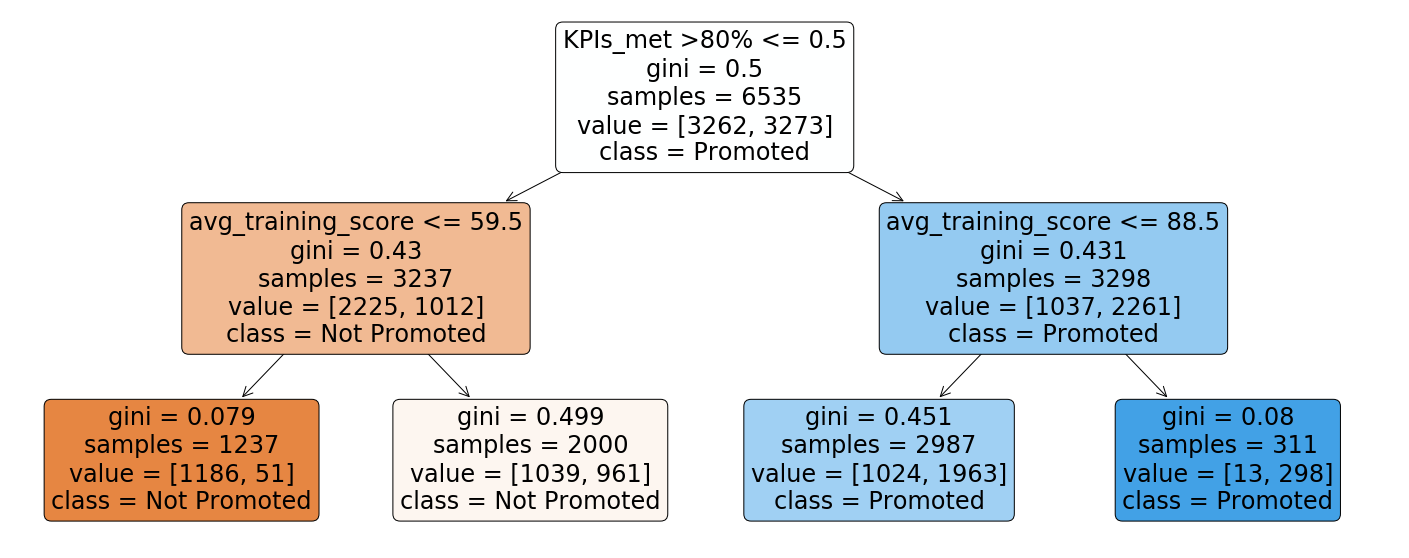

In [18]:
#Displaying trees for classification model
plt.figure(figsize=(25,10))
tree.plot_tree(dt,
              feature_names = list(data.drop(['is_promoted'], axis=1)),
                class_names = ['Not Promoted', 'Promoted'],
                rounded = True,
                filled= True)
plt.savefig('tree1.png',format='png')
plt.show()      

In [19]:
#Creating Model for Logistics Regression
lg = LogisticRegression(solver='lbfgs',
                        max_iter=10000)
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#Creating Support Vector Classifier
svc = SVC(gamma="auto")
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 1.3 Evaluate and Improve the Model(s)

In [21]:
#Accuracy of Decision Tree Classification
print('training accuracy is: ', dt.score(x_train,y_train))
print('testing accuracy is: ', dt.score(x_test,y_test))

training accuracy is:  0.6864575363427697
testing accuracy is:  0.6990360585505176


In [22]:
#Creating Random Forest (Ensemble of Decision Trees)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
print('training accuracy is: ', rf.score(x_train,y_train))
print('testing accuracy is: ', rf.score(x_test,y_test))

training accuracy is:  0.9996939556235654
testing accuracy is:  0.7479471617279543


In [23]:
#Grid search for random forest classifier

rf_gs = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [2, 4, 6, 8], 
              "min_samples_leaf" : [1, 5, 10], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(df_x, df_y)

print(gs.best_score_)
print(gs.best_params_)

0.7660668380462725
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 100}


In [24]:
#Create random forest with new parameters
rf_final = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=5, n_estimators=10)
rf_final.fit(x_train, y_train)
print('training accuracy is: ', rf_final.score(x_train,y_train))
print('testing accuracy is: ', rf_final.score(x_test,y_test))

results  = cross_validate(rf_final, df_x, df_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

training accuracy is:  0.7730680948737567
testing accuracy is:  0.7661549446626205
cross val training accuracy is: 0.7720384268729981
cross val testing accuracy is: 0.7643545836575161


In [25]:
#Accuracy of Logistics Regression
print('training accuracy is: ', lg.score(x_train,y_train))
print('testing accuracy is: ', lg.score(x_test,y_test))

training accuracy is:  0.7218056618209641
testing accuracy is:  0.7300963941449482


In [26]:
#Using AdaBoot for Logistic Regression
adb = AdaBoostClassifier(LogisticRegression(solver='lbfgs'), n_estimators=20, learning_rate = 0.2)
adb.fit(x_train, y_train)
print('training accuracy is: ', adb.score(x_train,y_train))
print('testing accuracy is: ', adb.score(x_test,y_test))

training accuracy is:  0.6651874521805662
testing accuracy is:  0.6608354159228846


In [27]:
#Using XGBoost for Logistic Regression
xgb = XGBClassifier(objective="binary:logistic", missing=None, seed=42)
xgb.fit(x_train, y_train)
print('training accuracy is: ', xgb.score(x_train,y_train))
print('testing accuracy is: ', xgb.score(x_test,y_test))

training accuracy is:  0.7666411629686305
testing accuracy is:  0.770439128882542


In [28]:
#Accuracy of SVC Model
print('training accuracy is: ', svc.score(x_train,y_train))
print('testing accuracy is: ', svc.score(x_test,y_test))

training accuracy is:  0.8899770466717674
testing accuracy is:  0.6601213852195644


In [29]:
#Using GridSearch to search for Hyperparameters for SVC Model
svc_gs = SVC(gamma='auto')

param_grid = {'kernel' : ['linear','rbf'], 'random_state' : [2,4,6]}

gs = GridSearchCV(svc_gs, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)

gs = gs.fit(x_train, y_train)  

print(gs.best_score_)
print(gs.best_params_)

0.7107880642693191
{'kernel': 'linear', 'random_state': 2}


In [30]:
#Using new Hyperparameters to create Support Vector Classifier
final_svc = SVC(gamma='auto', kernel='linear', random_state=2)
final_svc.fit(x_train, y_train)
print('training accuracy is: ', final_svc.score(x_train,y_train))
print('testing accuracy is: ', final_svc.score(x_test,y_test))

training accuracy is:  0.7107880642693191
testing accuracy is:  0.7193859335951446


## 2. Airbnb Singapore

### 2.1 Load and Sample the data

In [59]:
data = pd.read_csv('listing_new.csv')
df_x = data.drop(['price'], axis=1)
df_y = data['price']
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state = 2)

In [60]:
print(x_train, y_train)

      neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
4943                    2             17   1.29648  103.82920          0   
3323                    2             27   1.29492  103.84274          2   
5098                    2             17   1.29582  103.82937          2   
3504                    2             15   1.28147  103.84630          2   
7274                    2             15   1.28222  103.84438          0   
...                   ...            ...       ...        ...        ...   
3606                    2              9   1.30799  103.85035          1   
5704                    2             21   1.27478  103.84369          2   
6637                    1             30   1.35229  103.82090          2   
2575                    5             25   1.36480  103.85425          0   
7336                    2             12   1.30571  103.89820          2   

      minimum_nights  number_of_reviews  last_review  reviews_per_month  \
4943        

In [61]:
print(x_test, y_test)

      neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
5608                    2             34   1.34673  103.85380          2   
2927                    4              8   1.33975  103.70385          0   
4717                    2              6   1.31406  103.89815          2   
4151                    2              4   1.28085  103.82570          2   
7332                    5             31   1.39915  103.88931          0   
...                   ...            ...       ...        ...        ...   
4691                    2             19   1.31079  103.86213          2   
3676                    2             21   1.27799  103.85002          2   
6945                    2             19   1.31494  103.85425          0   
6139                    2             20   1.32580  103.84853          2   
2420                    2             21   1.27345  103.84580          2   

      minimum_nights  number_of_reviews  last_review  reviews_per_month  \
5608        

### 2.2 Build the Model(s)

In [62]:
#Creating Decision Tree Model
dtr = DecisionTreeRegressor(max_depth = 2)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

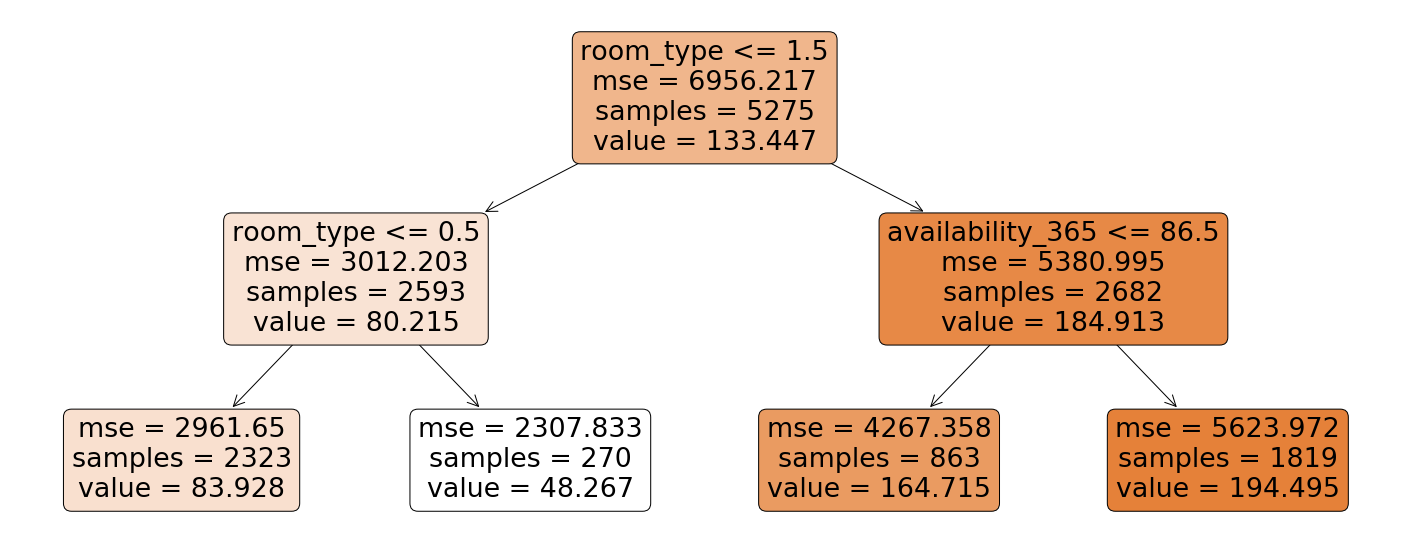

In [63]:
#Displaying trees for regression model
plt.figure(figsize=(25,10))
tree.plot_tree(dtr,
              feature_names = list(data.drop(['price'], axis=1)),
                rounded = True,
                filled= True)
plt.savefig('tree1.png',format='png')
plt.show()      

In [64]:
#Creating Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#Creating ANN Model
mlp = MLPRegressor(activation ='relu', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'adam', random_state=2)
# Fit the model to the training set
mlp.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

### 2.3 Evaluate and Improve the Model(s)

In [66]:
#Summary of overall data values
lm2 = sm.OLS(y_train, x_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.826
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              2266.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                        0.00
Time:                        20:13:24   Log-Likelihood:                         -29562.
No. Observations:                5275   AIC:                                  5.915e+04
Df Residuals:                    5264   BIC:                                  5.922e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood_group               -0.4926      1.249     -0.394      0.693      -2.941       1.956
neighbourhood                      0.5130      0.113      4.553      0.000       0.292       0.734
latitude                        -187.8024     33.507     -5.605      0.000    -253.490    -122.115
longitude                          2.9466      0.415      7.095      0.000       2.132       3.761
room_type                         49.4527      1.029     48.081      0.000      47.436      51.469
minimum_nights                    -0.1693      0.021     -7.889      0.000      -0.211      -0.127
number_of_reviews                 -0.2013      0.040     -5.001      0.000      -0.280      -0.122
last_review                        0.0043      0.001      4.044      0.000       0.002       0.006
reviews_per_month                  6.4177      1.109      5.786      0.000       4.243       8.592
calculated_host_listings_count    -0.0346      0.016     -2.223      0.026      -0.065      -0.004
availability_365                   0.0586      0.007      8.989      0.000       0.046       0.071
==============================================================================
Omnibus:                      707.567   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1116.027
Skew:                           0.937   Prob(JB):                    4.55e-243
Kurtosis:                       4.250   Cond. No.                     4.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
#MSE and R^2 Score of Decision Tree Regression
y_fitted = dtr.predict(x_train)
y_predict = dtr.predict(x_test)
print("The training RMSE is: ", sqrt(mean_squared_error(y_fitted, y_train)))
print("The training R^2 Value is:", dtr.score(x_train, y_train))
print("The testing RMSE is: ", sqrt(mean_squared_error(y_predict, y_test)))
print("The testing R^2 Value is: ", dtr.score(x_test, y_test))

The training RMSE is:  63.71703200225704
The training R^2 Value is: 0.4163695226233979
The testing RMSE is:  64.76298084968408
The testing R^2 Value is:  0.4191281695108545


In [68]:
#GridSearch for Decision Tree Regressor
dtr_gs = DecisionTreeRegressor(max_depth=2)

param_grid = { "criterion" : ["mse", "friedman_mse"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dtr_gs, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)

gs = gs.fit(x_train, y_train) 

print(gs.best_score_)
print(gs.best_params_)

-3250.055404544162
{'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 12}


In [78]:
#Creating decision tree regression with new parameters
dtr_final = DecisionTreeRegressor(criterion="mse", max_depth=7, min_samples_leaf=10, min_samples_split=10)
dtr_final.fit(x_train, y_train)

y_fitted = dtr_final.predict(x_train)
y_predict = dtr_final.predict(x_test)
print("The training RMSE is: ", sqrt(mean_squared_error(y_fitted, y_train)))
print("The training R^2 Value is:", dtr_final.score(x_train, y_train))
print("The testing RMSE is: ", sqrt(mean_squared_error(y_predict, y_test)))
print("The testing R^2 Value is: ", dtr_final.score(x_test, y_test))

The training RMSE is:  52.48668781041627
The training R^2 Value is: 0.6039726114850089
The testing RMSE is:  58.14330752019335
The testing R^2 Value is:  0.5318056994383209


In [70]:
#MSE and R^2 Score of Linear Regression
y_fitted = lr.predict(x_train)
y_predict = lr.predict(x_test)
print("The training RMSE is: ", sqrt(mean_squared_error(y_fitted, y_train)))
print("The training R^2 Value is:", lr.score(x_train, y_train))
print("The testing RMSE is: ", sqrt(mean_squared_error(y_predict, y_test)))
print("The testing R^2 Value is: ", lr.score(x_test, y_test))

The training RMSE is:  65.70476977577216
The training R^2 Value is: 0.37938726498821607
The testing RMSE is:  66.49553552767638
The testing R^2 Value is:  0.3876332069326155


In [71]:
#Build Ada Boost Model for Linear Regression
adb = AdaBoostRegressor(LinearRegression(),n_estimators=20, learning_rate = 0.2)
adb.fit(x_train, y_train)

y_fitted = adb.predict(x_train)
y_predict = adb.predict(x_test)
print("The training RMSE is: ", sqrt(mean_squared_error(y_fitted, y_train)))
print("The training R^2 Value is:", adb.score(x_train, y_train))
print("The testing RMSE is: ", sqrt(mean_squared_error(y_predict, y_test)))
print("The testing R^2 Value is: ", adb.score(x_test, y_test))

The training RMSE is:  66.78935441356134
The training R^2 Value is: 0.35872932769706634
The testing RMSE is:  67.28651903103248
The testing R^2 Value is:  0.37297800039268825


In [ ]:
#Build XGBoost Model for Linear Regression
xgb = XGBRegressor(objective="reg:squarederror", missing=None, seed=42)
xgb.fit(x_train, y_train)

y_fitted = xgb.predict(x_train)
y_predict = xgb.predict(x_test)
print("The training RMSE is: ", sqrt(mean_squared_error(y_fitted, y_train)))
print("The training R^2 Value is:", xgb.score(x_train, y_train))
print("The testing RMSE is: ", sqrt(mean_squared_error(y_predict, y_test)))
print("The testing R^2 Value is: ", xgb.score(x_test, y_test))

In [73]:
#MSE and R^2 Score of ANN Regressor
y_fitted = mlp.predict(x_train)
y_predict = mlp.predict(x_test)
print("The training RMSE is: ", sqrt(mean_squared_error(y_fitted, y_train)))
print("The training R^2 Value is:", mlp.score(x_train, y_train))
print("The testing RMSE is: ", sqrt(mean_squared_error(y_predict, y_test)))
print("The testing R^2 Value is: ", mlp.score(x_test, y_test))

The training RMSE is:  65.27949881928784
The training R^2 Value is: 0.3873950379350458
The testing RMSE is:  66.0910569926196
The testing R^2 Value is:  0.3950603492320418


In [74]:
#Tuning hyperparameter for ANN Regressor
hls_range = range(10,100,20)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for h in hls_range:
    # Create Random Forest Model
    mlp_reg = MLPRegressor(activation ='relu', hidden_layer_sizes=(h,), max_iter= 2000, solver = 'adam', random_state=2)
    mlp_reg.fit(x_train, y_train) 
    train_mse.append(mean_squared_error(mlp_reg.predict(x_train), y_train))
    test_mse.append(mean_squared_error(mlp_reg.predict(x_test), y_test))
    
    results  = cross_validate(mlp_reg, df_x, df_y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))
    

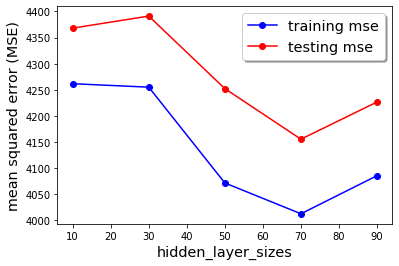

In [75]:
plt.plot(hls_range, train_mse, 'bo-', label ='training mse')
plt.plot(hls_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('hidden_layer_sizes', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

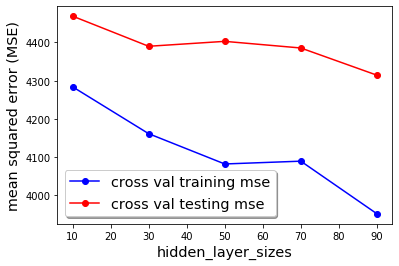

In [76]:
plt.plot(hls_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(hls_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('hidden_layer_sizes', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [77]:
#Creating ANN Regression with hidden_layer_sizes 90
mlp_final = MLPRegressor(activation ='relu', hidden_layer_sizes=(90,), max_iter= 2000, solver = 'adam', random_state=2)
# Fit the model to the training set
mlp_final.fit(x_train,y_train)

y_fitted = mlp_final.predict(x_train)
y_predict = mlp_final.predict(x_test)
print("The training RMSE is: ", sqrt(mean_squared_error(y_fitted, y_train)))
print("The training R^2 Value is:", mlp_final.score(x_train, y_train))
print("The testing RMSE is: ", sqrt(mean_squared_error(y_predict, y_test)))
print("The testing R^2 Value is: ", mlp_final.score(x_test, y_test))

The training RMSE is:  63.91449960201727
The training R^2 Value is: 0.4127464193326117
The testing RMSE is:  65.0105848769728
The testing R^2 Value is:  0.4146780610293914
